Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [314]:
# https://github.com/edenkabada/Machine_Learning_ex3

import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

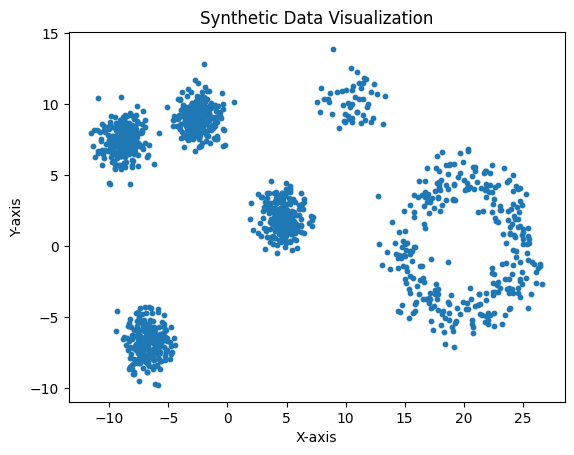

In [315]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.scatter(X[:, 0], X[:, 1],s=10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Synthetic Data Visualization")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [316]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette.append(score)
best_k = np.argmax(silhouette)

kmeans = KMeans(n_clusters=best_k, init='random', n_init=10)
kmeans.fit(X)

KMeans(init='random', n_clusters=4, n_init=10)

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [317]:
from sklearn.cluster import AgglomerativeClustering

silhouette = []
for k in  range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters= k, metric='manhattan', linkage='complete')
    labels = agglomerative.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette.append(score)
best_k = np.argmax(silhouette)

agglomerative = AgglomerativeClustering(n_clusters= best_k, metric='manhattan', linkage='complete')
agglomerative.fit(X)


AgglomerativeClustering(linkage='complete', metric='manhattan', n_clusters=7)

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [318]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=3, algorithm='brute')
labels = dbscan.fit(X)

6. Compare the results and choose the best method for the data


In [319]:
kmeans_score = silhouette_score(X, kmeans.labels_)
agglomerative_score = silhouette_score(X, agglomerative.labels_) if len(set(agglomerative.labels_)) > 1 else -1
dbscan_score = silhouette_score(X, dbscan.labels_) if len(set(dbscan.labels_)) > 1 else -1

print(f"Silhouette Score - KMeans: {kmeans_score}")
print(f"Silhouette Score - Agglomerative: {agglomerative_score}")
print(f"Silhouette Score - DBSCAN: {dbscan_score}")
best_method = max((kmeans_score, "KMeans"), (agglomerative_score, "Agglomerative"), (dbscan_score, "DBSCAN"))
print(f"Best method: {best_method[1]}")




Silhouette Score - KMeans: 0.6813192037113843
Silhouette Score - Agglomerative: 0.6687245324014567
Silhouette Score - DBSCAN: 0.713499236081091
Best method: DBSCAN
